# **Assignment 04 - Neural Networks**

# Part 1: Neural network model on the credit card approval dataset
Data source: http://archive.ics.uci.edu/ml/datasets/credit+approval

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as roc

# Making numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Dense, Dropout

### Preparing the dataset

In [4]:
from google.colab import files
 
uploaded = files.upload()

Saving creditcardapproval.csv to creditcardapproval.csv


In [5]:
header_names=['A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('creditcardapproval.csv',names=header_names)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [6]:
df.shape

(690, 16)

In [7]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [8]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [9]:
for col in ['A1', 'A4', 'A5', 'A6', 'A7']:
    print(col, ": ", df[col].unique(), '\n')

A1 :  ['b' 'a' '?'] 

A4 :  ['u' 'y' '?' 'l'] 

A5 :  ['g' 'p' '?' 'gg'] 

A6 :  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?'] 

A7 :  ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n'] 



In [10]:
df = df.replace('?',np.NaN)

In [11]:
object_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']
df[['A2', 'A14']] = df[['A2', 'A14']].apply(pd.to_numeric, errors='coerce')
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])
df = df.dropna()


In [12]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [13]:
#Listing all categorical columns
# object_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

#Ordinal-encoding of categorical columns
# transformed_df = df.copy()
# ordinal_encoder = OrdinalEncoder()
# transformed_df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])
# transformed_df = transformed_df.dropna()
# df.isna().sum()

#Previewing ordinal-encoded features
# transformed_df.head()

In [14]:
# transformed_df.dtypes

In [15]:
# transformed_df.shape

### Visualizing the target class 'A16'

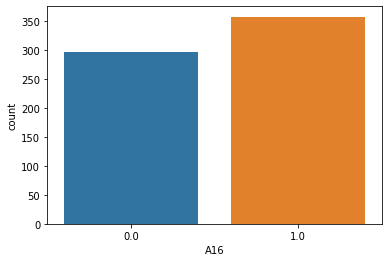

In [16]:
sns.countplot(x='A16', data=df)

### Creating the model

In [26]:
# positiveTrain, positiveTest = train_test_split(positiveDataset, test_size=0.2, random_state=21)
# negativeTrain, negativeTest = train_test_split(negativeDataset, test_size=0.5)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df.loc[:, df.columns != 'A16']
y = df['A16']

#####Attempted creating a pipeline and normalizing but couldn't get it to work#####

# numeric_features = df.select_dtypes(exclude='O').columns

# numeric_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="median")),
#            ("scaler", StandardScaler())]
# )

# categorical_features = X.select_dtypes(include='O').columns
# categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("cat", categorical_transformer, categorical_features),
#     ]
# )

# normalize = preprocessing.Normalization()
# normalize.adapt(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# #creating a classifier
# def classifierCreator():
#     clf = tf.keras.models.Sequential()

#     clf.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
#     clf.add(Dense(100, activation='relu'))
#     clf.add(Dense(1,  activation='relu'))


#     return clf

# nnmodel = classifierCreator().compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# nnPipe = Pipeline(
#     steps=[("preprocessor", preprocessor), 
#            ("classifier", nn_model)]
# )

# # clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# nnPipe.fit(X_train, y_train)
# print("model score: %.3f" % nnPipe.score(X_test, y_test))




In [28]:
# create classifier
def classifierCreator():
    clf = tf.keras.models.Sequential()

    clf.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
    clf.add(Dense(100, activation='relu'))
    clf.add(Dense(1,  activation='relu'))


    return clf

In [29]:
#create Classifier object and scale the dataset
classifier = classifierCreator()

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

scaler = StandardScaler()

xTrain = scaler.fit_transform(X_train)
xTest = scaler.fit_transform(X_test)

In [30]:
from tensorflow.python import nn
#fit the dataset to the train values

history = classifier.fit(xTrain, y_train, epochs=15, verbose=1)
classifier.summary()
# history.history.keys()

Epoch 1/15
16/16 [==============================] - 1s 3ms/step - loss: 1.8975 - accuracy: 0.6196
Epoch 2/15
16/16 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.8569
Epoch 3/15
16/16 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.8937
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 0.7319 - accuracy: 0.8732
Epoch 5/15
16/16 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.8650
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.8814
Epoch 7/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4816 - accuracy: 0.8998
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.9018
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 0.4198 - accuracy: 0.9121
Epoch 10/15
16/16 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.9182
Epoch 11/15
16/16 [

### Evaluating the model using precision and recall 

In [31]:
#predict the model on the train values and check results

predictTrain = classifier.predict(xTrain) 
classesTrain = np.argmax(predictTrain,axis=1)

print(classification_report(y_train, classesTrain))
print('ROC AUC Score: ',roc(y_train, classesTrain))

print(classifier.evaluate(xTrain, y_train))

16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       227
         1.0       0.00      0.00      0.00       262

    accuracy                           0.46       489
   macro avg       0.23      0.50      0.32       489
weighted avg       0.22      0.46      0.29       489

ROC AUC Score:  0.5
16/16 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.9366
[0.38219645619392395, 0.9366053342819214]


In [32]:
#predict test values and check results
predictTest = classifier.predict(xTest)
classesTest=np.argmax(predictTest,axis=1)

print(classification_report(y_test, classesTest)) 
print('ROC AUC Score: ',roc(y_test, classesTest))

print(classifier.evaluate(xTest, y_test))

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59        69
         1.0       0.00      0.00      0.00        95

    accuracy                           0.42       164
   macro avg       0.21      0.50      0.30       164
weighted avg       0.18      0.42      0.25       164

ROC AUC Score:  0.5
6/6 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.8659
[0.9358972907066345, 0.8658536672592163]


The model accuracy is higher on the train set than the test set.